# Laboratorium 2 - Interpolacja

##### Aleksandra Mazur

## Zadanie 1  Wielomiany interpolujące

In [1]:
from numpy import vander
from numpy import linalg
from matplotlib import pyplot as plt

Dla funkcji $f(x) = \frac{1}{1 + x^2}$ i n = 5, 10, 15 wyliczono wielomian interpolacyjny pn z n + 1 węzłami równoodległymi w przedziale [-5, 5]

In [2]:
def f(x):
    return 1 / (1 + x ** 2)

Poniższa funkcja oblicza n + 1 równoodległych punktów w przedziale [-5,5]

In [3]:
def createPoints(n):
    points = []
    step = 10/n
    for i in range(0, n + 1):
        points.append(- 5 + i * step)
    return points

W celu zinterpolowania funkcji wykorzystano interpolację wielomianową z macierzą Vandermonda.

In [12]:
def p(n):
    X = createPoints(n)
    V = vander(X, increasing = True)
    Y = []
    
    for i in range(0, n + 1):
        Y.append(f(X[i]))
    
    A = linalg.solve(V, Y)
    resX = createPoints(100)
    resY = []
    err = []
    
    for x in resX:
        sum = 0
        for i in range (n + 1):
            sum += A[i] * (x ** i)
        resY.append(sum)
        err.append(abs(sum - f(x)))
    
    plt.plot(resX, resY, label = 'p(x)')
    real = []
    for x in resX:
        real.append(f(x))
    plt.plot(resX, real, label = 'f(x)')
    plt.plot(resX, err, label = 'Reszty interpolacji')
    plt.legend()
    plt.show()

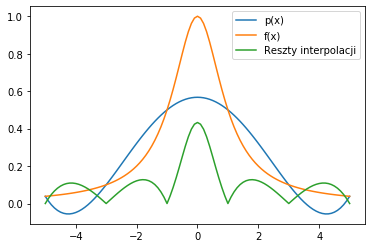

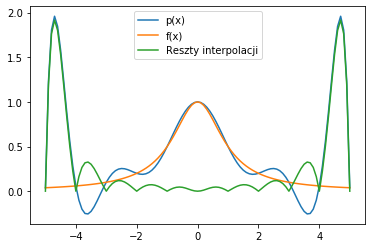

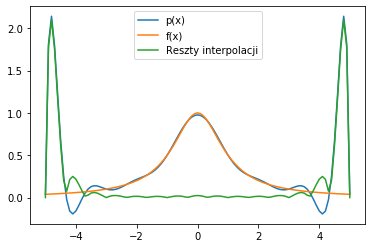

In [13]:
for n in [5, 10, 15]:
    p(n)

Na powyższych wykresach można zaobserwować, że wraz ze zwiększaniem liczby punktów, błąd w centralnej części wykresu maleje, natomiast na skrajach przedziału - rośnie. Jest to spowodowane efektem Rungego.

###### Efekt Rungego
Jest to pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów. Początkowo ze wzrostem liczby węzłów n przybliżenie poprawia się, jednak po dalszym wzroście n, zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziałów. Takie zachowanie się wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów. Występuje ono również, jeśli interpolowana funkcja jest nieciągła albo odbiega znacząco od funkcji gładkiej.

In [17]:
def error(n):
    X = createPoints(n)
    V = vander(X, increasing = True)
    Y = []
    
    for i in range(0, n + 1):
        Y.append(f(X[i]))
    A = linalg.solve(V, Y)
    
    resX = createPoints(100)
    err = []
    
    for x in resX:
        sum = 0
        for i in range (n + 1):
            sum += A[i] * (x ** i)
        err.append(abs(sum - f(x)))
    
    plt.plot(resX, err)
    plt.show()

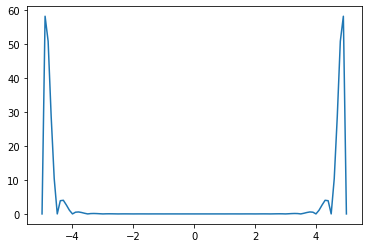

In [18]:
error(20)

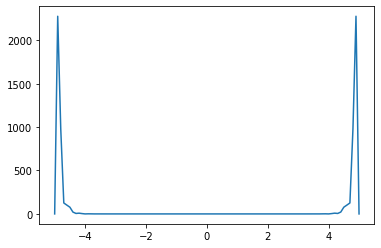

In [20]:
error(30)

Jak widać na powyższych wykresach - błąd na krańcach przedziału wzrósł dla większej liczby punktów.

# Zadanie 2  Wielomiany interpolujące

Aby uniknąć efektu Rungego, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji. Np. węzłami interpolacji n-punktowej wielomianowej powinny być miejsca zerowe wielomianu Czebyszewa n-tego stopnia.

Zatem dla danej funkcji i przedziału z poprzedniego zadania oraz n = 15, znaleziono wielomian interpolacyjny w węzłach Czebyszewa, danych poniższym wzorem.

$xk = \frac{1}{2}(a + b) + \frac{1}{2}(b - a)\cos(\frac{2k - 1}{2n}\pi)$

gdzie k = 1, .., n, natomiast a, b są odpowiednio początkiem i końcem przedziału interpolacji

In [17]:
from numpy import cos
from numpy import pi

a = -5
b = 5

def czebyszew(n):
    X = []
    Y = []
    for k in range(1, n + 1):
        X.append((1/2) * (a + b) + (1/2) * (b - a) * cos ((2 * k - 1) * pi / (2 * n)))
    V = vander(X, increasing = True)
    
    for x in X:
        Y.append(f(x))
    A = linalg.solve(V, Y)
    
    resX = createPoints(100)
    resY = []
    err = []
    
    for x in resX:
        sum = 0
        for i in range (n):
            sum += A[i] * (x ** i)
        resY.append(sum)
        err.append(abs(sum - f(x)))
    
    plt.plot(resX, resY, label = 'p(x)')
    real = []
    for x in resX:
        real.append(f(x))
    plt.plot(resX, real, label = 'f(x)')
    plt.plot(resX, err, label = 'Reszty interpolacji')
    plt.legend()
    plt.show()

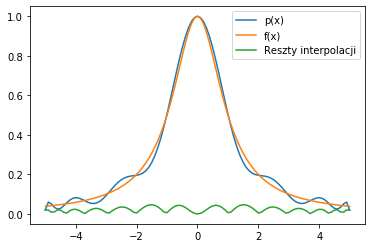

In [18]:
czebyszew(15)

Jak widać na powyższym wykresie błąd interpolacji na końcach przedziału jest znacznie mniejszy w porównaniu do wyników z poprzedniego zadania. Jednak błąd w centralnej części funkcji nieznacznie wzrósł.

# Zadanie 3 Interpolacja krzywych funkcjami sklejanymi

Mając daną elipsę w postaci parametrycznej

$x = a\cos({t})$

$y = b\sin({t})$

gdzie t należy do przedziału [0,$2\pi$]

wykonano jej interpolację sześciennymi funkcjami sklejanymi dla 10-ciu równoodległych punktów osobno dla zbioru punktów x i y. Użyto funkcji interpolate.interp1d z biblioteki scipy.

W metodzie interpolacji krzywych funkcjami sklejanymi (splajnami) stosowane są funkcje zdefiniowane jako wielomiany niskiego stopnia osobno dla każdego odcinka pomiędzy sąsiednimi węzłami interpolacyjnymi. Te lokalne wielomiany są jednak tak dobrane, aby – oprócz warunków interpolacji – spełniać warunki sklejenia w taki sposób, aby cały splajn był funkcją o odpowiedniej regularności.

In [19]:
from scipy import interpolate
from numpy import sin
from numpy import linspace

a = -5
b = 5

def x_t(t):
    return a * cos(t)
def y_t(t):
    return b * sin(t)

In [24]:
def interpolate_spline(n):
    t = linspace(0, 2 * pi, n)

    spline = interpolate.interp1d(t, list(map(x_t, t)), kind = 'cubic')
    spline2 = interpolate.interp1d(t, list(map(y_t, t)), kind = 'cubic')
    
    T = linspace(0, 2 * pi, 30)
    X = []
    Y = []
    for t in T:
        X.append(spline(t))
        Y.append(spline2(t))
    plt.plot(X, Y)
    plt.show()

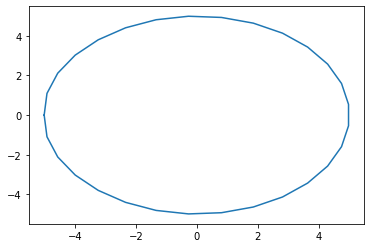

In [25]:
interpolate_spline(10)

Interpolacja funkcjami sklejanymi dla 10-ciu punktów daje zadowalający wynik.

# Wnioski

Błąd interpolacji można zmniejszać poprzez zwiększanie liczby węzłów, jednak prowadzi to do dość szybkiego wzrostu złożoności obliczeniowej zadania, a spadek wartości błędu nie jest pewny (efekt Rungego). Ponieważ wielomiany są funkcjami dość regularnymi, nie nadają się zbytnio do przybliżania funkcji nieregularnych na większych przedziałach. Z tego powodu wybiera się interpolację wielomianami niskiego stopnia, czyli interpolację funkcjami sklejanymi. Zadowalające wyniki daje również interpolacja w węzłach Czebyszewa.